In [24]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

In [25]:
# Cargar el dataset
df = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_raw.csv')

In [26]:
# Mostrar columna de datos
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [27]:
# Mostrar el dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,36.720310,-4.356270,Entire home/apt,54.0,3,250,2025-03-01,1.79,1,259,39,VUT/MA/22043
1,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.720310,-4.361080,Private room,22.0,5,101,2025-02-11,0.61,5,301,4,NaN
2,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526,Mayte,NaN,Centro,36.729786,-4.413462,Private room,51.0,1,60,2025-02-23,0.38,6,218,5,VFT/MA/12240
3,340024,NEW APARTMENT IN MALAGA CENTER,1725690,Carlos,NaN,Centro,36.728130,-4.414220,Entire home/apt,65.0,3,301,2025-03-14,2.05,1,215,42,VFT/MA/02334
4,358541,Casa La Maga - Apartment for happy people,1526932,Cristina,NaN,Centro,36.723740,-4.421300,Entire home/apt,86.0,2,388,2025-03-07,2.47,1,100,22,VFT/MA/02288


In [28]:
# Mostrar info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9621 non-null   int64  
 1   name                            9621 non-null   object 
 2   host_id                         9621 non-null   int64  
 3   host_name                       9621 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9621 non-null   object 
 6   latitude                        9621 non-null   float64
 7   longitude                       9621 non-null   float64
 8   room_type                       9621 non-null   object 
 9   price                           8711 non-null   float64
 10  minimum_nights                  9621 non-null   int64  
 11  number_of_reviews               9621 non-null   int64  
 12  last_review                     84

In [29]:
# Corregir tipos de datos
# 'last_review' de object a datetime Dtype
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d', errors='coerce')

# 'neighbourhood_group' de float a string
df['neighbourhood_group'] = df['neighbourhood_group'].astype(str)

# Mostrar info del dataset corregido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              9621 non-null   int64         
 1   name                            9621 non-null   object        
 2   host_id                         9621 non-null   int64         
 3   host_name                       9621 non-null   object        
 4   neighbourhood_group             9621 non-null   object        
 5   neighbourhood                   9621 non-null   object        
 6   latitude                        9621 non-null   float64       
 7   longitude                       9621 non-null   float64       
 8   room_type                       9621 non-null   object        
 9   price                           8711 non-null   float64       
 10  minimum_nights                  9621 non-null   int64         
 11  numb

In [30]:
# Mostrar estadisticas descriptivas del dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.621000e+03,9.621000e+03,9621.000000,9621.000000,8711.000000,9621.000000,9621.000000,8454,8454.000000,9621.000000,9621.000000,9621.000000
mean,6.352695e+17,2.173691e+08,36.720323,-4.421476,244.892320,3.412743,46.334061,2024-10-16 05:45:56.848828928,1.402359,24.359526,162.154142,12.739840
min,9.603300e+04,4.555300e+04,36.646012,-4.582370,15.000000,1.000000,0.000000,2013-12-31 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,4.222275e+07,4.842949e+07,36.718342,-4.429060,70.000000,1.000000,3.000000,2024-09-14 00:00:00,0.350000,2.000000,36.000000,1.000000
50%,7.731022e+17,1.420223e+08,36.722330,-4.422676,96.000000,2.000000,15.000000,2025-02-11 00:00:00,0.910000,5.000000,164.000000,5.000000
75%,1.131138e+18,3.821465e+08,36.725450,-4.417670,135.000000,3.000000,53.000000,2025-03-14 00:00:00,2.000000,28.000000,272.000000,18.000000
max,1.386258e+18,6.860863e+08,36.881336,-4.278520,92150.000000,500.000000,1027.000000,2025-03-31 00:00:00,24.940000,218.000000,365.000000,174.000000
std,5.262896e+17,1.946497e+08,0.013373,0.024403,1424.502555,12.882824,79.124776,NaN,1.479701,41.498793,123.696936,17.853952


In [31]:
# Comprobación de duplicados
df.duplicated().sum()

np.int64(0)

In [32]:
# Comprobación de valores nulos
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              910
minimum_nights                       0
number_of_reviews                    0
last_review                       1167
reviews_per_month                 1167
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            141
dtype: int64

In [33]:
# Porcentaje de valores nulos
df.isnull().mean() * 100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              9.458476
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       12.129716
reviews_per_month                 12.129716
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                            1.465544
dtype: float64

<Axes: >

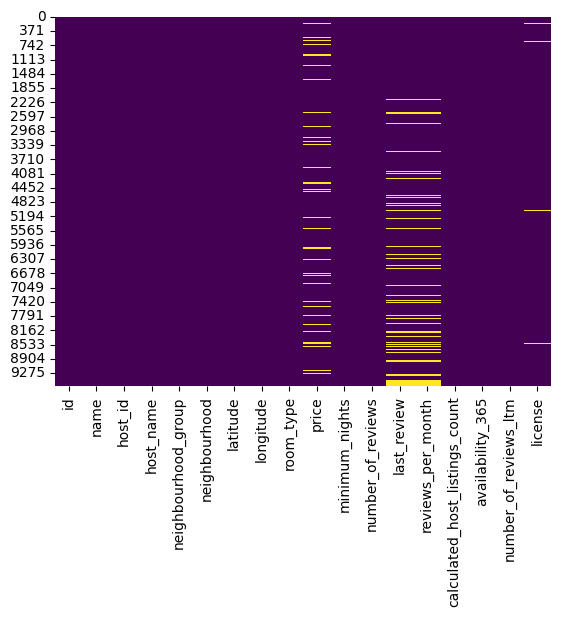

In [34]:
# Visualización de los datos nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


In [35]:
# Verificar cantidad de filas con 'number_of_reviews' igual a 0 y 'last_review' nulo
print ("Cantidad de filas con 'number_of_reviews' igual a 0 y 'last_review' nulo:")
df[(df['number_of_reviews'] == 0) & (df['last_review'].isnull())].shape[0]


Cantidad de filas con 'number_of_reviews' igual a 0 y 'last_review' nulo:


1167

In [36]:
from datetime import datetime

# 1. Filas con fechas nulas
df['last_review_null'] = df['last_review'].isnull()
print("Fechas nulas marcadas:", df['last_review_null'].sum())

# 2. Filas con fechas futuras
hoy = datetime.now()
df['last_review_future'] = df['last_review'] > hoy
print ("Fechas futuras marcadas:", df['last_review_future'].sum())

# 3. Filas con fechas sin sentido por ej '2023-02-30' o '2023-13-01' (ignorando las nulas originales)
df['last_review_invalid'] = (
    df['last_review'].notnull() & 
    df['last_review'].apply(lambda x: pd.to_datetime(x, errors='coerce')).isnull()
)
print("Fechas inválidas marcadas:", df['last_review_invalid'].sum())

# 4. Eliminar columnas auxiliares
df.drop(columns=['last_review_null', 'last_review_future', 'last_review_invalid'], inplace=True)

Fechas nulas marcadas: 1167
Fechas futuras marcadas: 0
Fechas inválidas marcadas: 0


In [37]:
# Filtrar filas vacias
no_last_review = df[df['last_review'].isnull()]

# Si 'number_of_reviews' = 0 , rellenamos 'last_review' con 0000-00-00
# Esta operación asegura que las filas con 0 reseñas y sin fecha de última reseña tengan una fecha predeterminada.
df.loc[(df['number_of_reviews'] == 0) & (df['last_review'].isnull()), 'last_review'] = '0000-00-00'

# Rellenar 'reviews_per_month' con 0 si es nulo
# Con esta operación, convertimos los valores nulos en 0 para evitar problemas en análisis posteriores.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Comprobar nulos en 'reviews_per_month' y 'last_review'
print("Nulos en 'reviews_per_month':", df['reviews_per_month'].isnull().sum())
print("Nulos en 'last_review':", df['last_review'].isnull().sum())

Nulos en 'reviews_per_month': 0
Nulos en 'last_review': 0


/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_72933/1698608116.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0000-00-00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[(df['number_of_reviews'] == 0) & (df['last_review'].isnull()), 'last_review'] = '0000-00-00'


In [38]:
# Imprimir las filas con 'last_review' = 0000-00-00, solo columnas 'id', 'number_of_reviews', 'last_review'
print(df[df['last_review'] == '0000-00-00'][['id', 'number_of_reviews', 'last_review']])

                       id  number_of_reviews last_review
27                 786648                  0  0000-00-00
29                 786656                  0  0000-00-00
42                1116972                  0  0000-00-00
136               3992497                  0  0000-00-00
179               4972419                  0  0000-00-00
...                   ...                ...         ...
9616  1386113325037443875                  0  0000-00-00
9617  1386118761230701266                  0  0000-00-00
9618  1386121143494673109                  0  0000-00-00
9619  1386121456628410971                  0  0000-00-00
9620  1386257800461789946                  0  0000-00-00

[1167 rows x 3 columns]


In [39]:
# Mostrar primeras 2 filas del dataset
df.head(2)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,nan,Este,36.72031,-4.35627,Entire home/apt,54.0,3,250,2025-03-01 00:00:00,1.79,1,259,39,VUT/MA/22043
1,166473,Perfect Location In Malaga,793360,Fred,nan,Este,36.72031,-4.36108,Private room,22.0,5,101,2025-02-11 00:00:00,0.61,5,301,4,NaN


In [40]:
# datos unicos en columna 'neighbourhood'
unique_neighbourhoods = df['neighbourhood'].unique()
# Mostrar los datos únicos
print("Datos únicos en 'neighbourhood':", unique_neighbourhoods)


Datos únicos en 'neighbourhood': ['Este' 'Centro' 'Churriana' 'Bailen-Miraflores' 'Carretera de Cadiz'
 'Cruz De Humilladero' 'Puerto de la Torre' 'Teatinos-Universidad'
 'Ciudad Jardin' 'Palma-Palmilla' 'Campanillas']


In [41]:
# Rellenar 'neighbourhood_group' con el valor de 'neighbourhood'
df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood'])

# Comprobar si hay valores nulos en 'neighbourhood_group'
print("Nulos en 'neighbourhood_group':", df['neighbourhood_group'].isnull().sum())

Nulos en 'neighbourhood_group': 0


In [44]:
# Revisar si las lineas con 'price' = 0 comparten ID con otra que si tiene precio
df_zero_price = df[df['price'] == 0]
# Verificar si hay IDs duplicados con precio 0
duplicate_ids = df_zero_price[df_zero_price.duplicated('id', keep=False)]['id'].unique()
# Mostrar los IDs duplicados
print("IDs con precio 0 que tienen duplicados:", duplicate_ids)


IDs con precio 0 que tienen duplicados: []
